In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [ ]:
wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
wine.columns = ['class label', 'alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline']
print('class label:', np.unique(wine['class label']))  # Class 출력

class label: [1 2 3]


In [ ]:
wine.head()

,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# 데이터 타입 체크
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class label           178 non-null    int64  
 1   alchohol              178 non-null    float64
 2   malic acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity of ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  OD208                 178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
# 데이터의 null값 체크
wine.isnull().sum()

# 결측치 없음

class label             0
alchohol                0
malic acid              0
ash                     0
alcalinity of ash       0
magnesium               0
total phenols           0
flavanoids              0
nonflavanoid phenols    0
proanthocyanins         0
color intensity         0
hue                     0
OD208                   0
proline                 0
dtype: int64

In [ ]:
wine.describe() # 기초 통계정보

,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


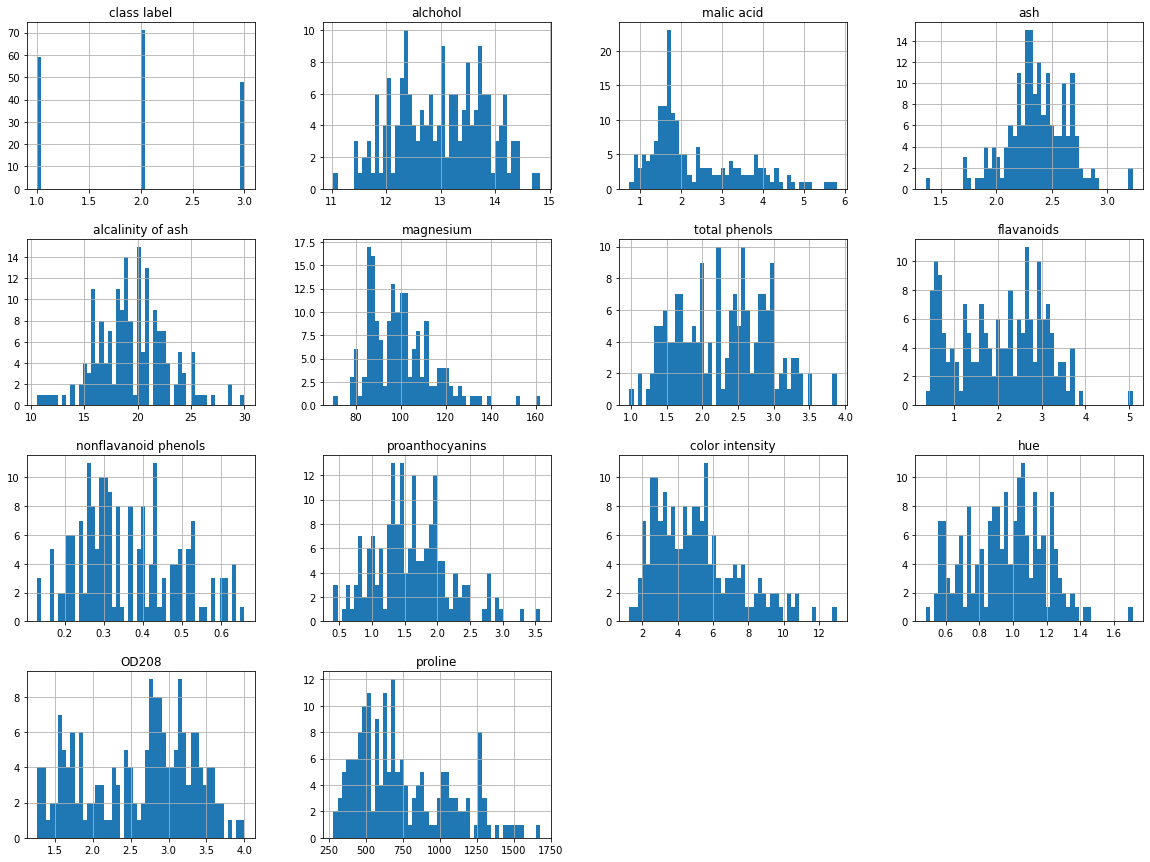

In [ ]:
%matplotlib inline
wine.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# class label과의 상관계수
corr_matrix = wine.corr() 
corr_matrix['class label'].sort_values(ascending=False)

class label             1.000000
alcalinity of ash       0.517859
nonflavanoid phenols    0.489109
malic acid              0.437776
color intensity         0.265668
ash                    -0.049643
magnesium              -0.209179
alchohol               -0.328222
proanthocyanins        -0.499130
hue                    -0.617369
proline                -0.633717
total phenols          -0.719163
OD208                  -0.788230
flavanoids             -0.847498
Name: class label, dtype: float64

# 공통 과제

seaborn 패키지의 kdeplot이나, displot, distplot 또는
from sklearn.neighbors import KernelDensity
를 이용하여 wine data의 한 변수를 kernel density를 이용한 그래프와, 실제 히스토그램을 모두 나타내어라. 

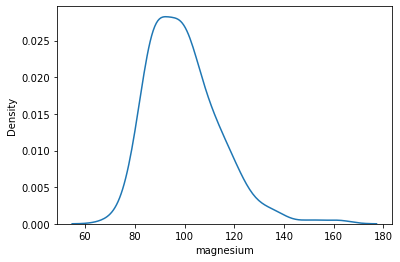

In [ ]:
mag = wine['magnesium']

# magnesium의 kdeplot
sns.kdeplot(mag)
plt.show()

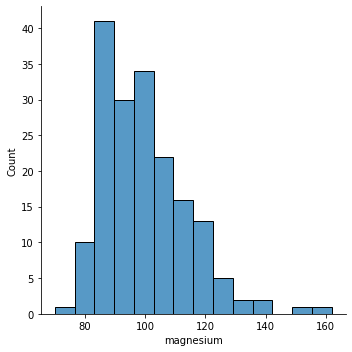

In [ ]:
# Magnesiu의 histogram
sns.displot(mag)
plt.show()

C:\Users\syjoo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


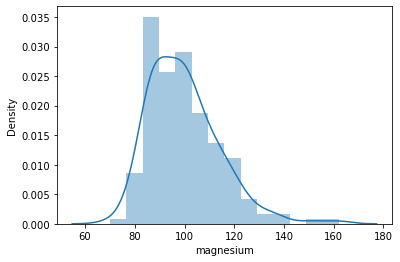

In [ ]:
# Magnesium의 distplot (히스토그램과 kdeplot을 같이 그려줌)
sns.distplot(mag)
plt.show()

# 팀별 과제

2. wine data를 이용하여 linear, quadratic 그리고 naive Bayesian 을 적용하여 그 결과를 비교하고 해석하세요.

### LDA model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


LDA = LinearDiscriminantAnalysis()

# X(13개 변수)와 y(class label) 데이터로 분류
X = np.array(wine.iloc[:,1:])
y = np.array(wine['class label'])

# 데이터 정규 스케일링 
X = StandardScaler().fit_transform(X)  # 평균 0, 분산 1로 조정

# scale된 X로 train, test set split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# LDA model
lda_model = LDA.fit(train_X, train_y)

### QDA model

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()

# 데이터는 lda와 동일 

# QDA model
qda_model = QDA.fit(train_X, train_y)

### Naive Bayesian model

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

# 데이터셋은 LDA, QDA와 동일

# NB model
nb_model = NB.fit(train_X,train_y)  # fit 함수가 training sample을 이용한 학습을 진행하는 과정

### StratifiedKFold 교차검정을 이용한 모델 비교 

stratifiedKFold는 target 속성값의 개수를 동일하게 가져감으로써 kfold 같이 데이터가 한곳으로 몰리는 것을 방지한다.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf=StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
lda_scores=cross_val_score(lda_model, X, y, cv=skf)
np.average(lda_scores)

0.9774011299435029

In [ ]:
qda_scores=cross_val_score(qda_model, X, y, cv=skf)
np.average(qda_scores)

0.9775894538606403

In [ ]:
nb_scores=cross_val_score(nb_model, X, y, cv=skf)
np.average(nb_scores)

0.9775894538606403

#### 시드값을 다르게 한다면...?

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf=StratifiedKFold(n_splits=3, random_state=1234, shuffle=True)
lda_scores=cross_val_score(lda_model, X, y, cv=skf)
np.average(lda_scores)

0.9661958568738229

In [ ]:
qda_scores=cross_val_score(qda_model, X, y, cv=skf)
np.average(qda_scores)

0.9831450094161959

In [ ]:
nb_scores=cross_val_score(nb_model, X, y, cv=skf)
np.average(nb_scores)

0.9606403013182674

random & shuffle = True 이면 정확도가 계속 다르게 나온다. 

그래서 이 데이터셋 자체가 세 모델의 뚜렷한 구분은 보여줄 수 없다고 생각했다. 

wine 데이터 자체의 데이터 개수가 178개로 많은 편이 아니어서, 
데이터의 수가 많아지고 분포가 그만큼 넓어진다면 모델 간의 차이가 커질 것이라고 생각했다.